## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

<AxesSubplot:>

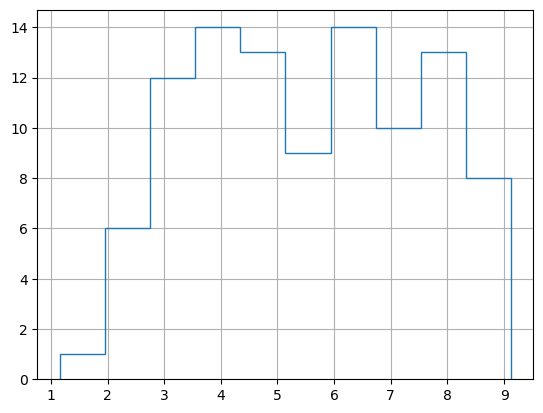

In [6]:
pop.grade.hist(histtype='step')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [8]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.248697
std,1.952313
min,1.983167
25%,3.617797
50%,4.946752
75%,7.015815
max,8.467353


In [9]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

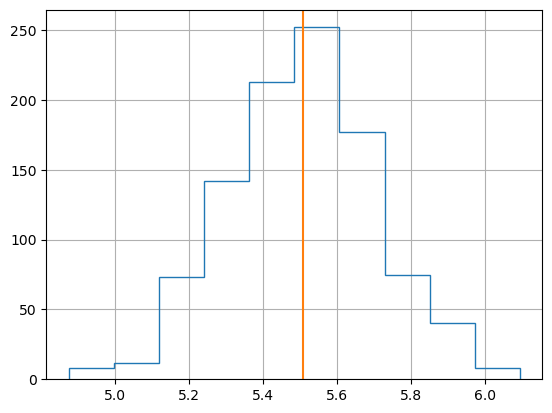

In [10]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='C1')

In [11]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.143926517084605, 5.908132220193675)

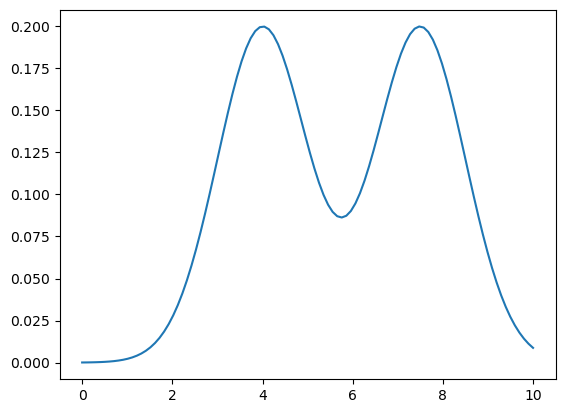

In [13]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [21]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [22]:
draw()

6.7981223881973545

In [23]:
def dataset (n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

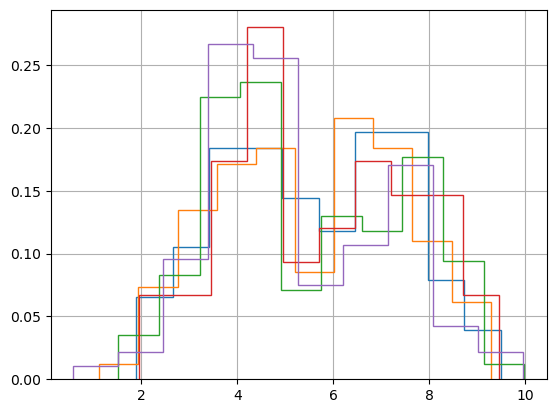

In [24]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [25]:
means = pd.DataFrame({'meangrade': [ dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

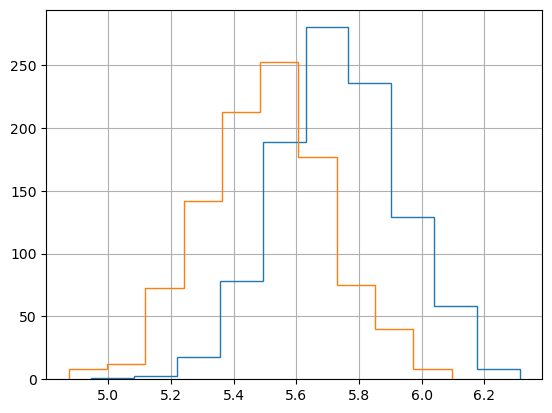

In [27]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')